## Neural Networks as Classifers

In this notebook we build different classification architectures for the IMDB reviews dataset ( a binary class problem) & the News Wire dataset ( a multi class problem) we aim to show how to process text data and tinker about it using Keras at the end we will build another slightly complex model where we use an Autoencoder for feature learning and feed the output to an output layer that performs classification on MNIST.

By the end of this notebook you should be able to use Keras and cie without issue and understand how to attack different classification problems .

In [0]:
from keras.datasets import imdb

In [0]:
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [0]:
# lets map the word back to english
word_index = imdb.get_word_index()
reverse_word_index = dict([(v,k) for (k,v) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [0]:
train_data[0]
decoded_review

import numpy as np
# preparing the data by vectorizing the sequences using hot encoding
def vectorize_sequence(sequences,dim=10000):
  res = np.zeros((len(sequences),dim))
  for i,sequence in enumerate(sequences):
    res[i,sequence] = 1. 
  return res



In [0]:
# vectorize train & test data resp
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

# vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(train_labels).astype('float32')



In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])


In [0]:
x_val = x_train[:5000]
y_val = y_train[:5000]
x_train_p = x_train[5000:]
y_train_p = y_train[5000:]



In [89]:
history = model.fit(x_train_p,y_train_p,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 89us/step - loss: 0.4726 - acc: 0.8065 - val_loss: 0.3671 - val_acc: 0.8576
Epoch 2/20
20000/20000 [==============================] - 1s 65us/step - loss: 0.2718 - acc: 0.9059 - val_loss: 0.2939 - val_acc: 0.8864
Epoch 3/20
20000/20000 [==============================] - 1s 66us/step - loss: 0.2025 - acc: 0.9306 - val_loss: 0.2697 - val_acc: 0.8916
Epoch 4/20
20000/20000 [==============================] - 1s 65us/step - loss: 0.1668 - acc: 0.9412 - val_loss: 0.2804 - val_acc: 0.8904
Epoch 5/20
20000/20000 [==============================] - 1s 64us/step - loss: 0.1407 - acc: 0.9516 - val_loss: 0.2834 - val_acc: 0.8898
Epoch 6/20
20000/20000 [==============================] - 1s 63us/step - loss: 0.1189 - acc: 0.9593 - val_loss: 0.3088 - val_acc: 0.8862
Epoch 7/20
20000/20000 [==============================] - 1s 65us/step - loss: 0.1058 - acc: 0.9648 - val_loss: 0.3275 - val_acc:

20000/20000 [==============================] - 1s 64us/step - loss: 0.0855 - acc: 0.9730 - val_loss: 0.4071 - val_acc: 0.8666
Epoch 9/20
20000/20000 [==============================] - 1s 64us/step - loss: 0.0771 - acc: 0.9755 - val_loss: 0.4581 - val_acc: 0.8616
Epoch 10/20
20000/20000 [==============================] - 1s 64us/step - loss: 0.0670 - acc: 0.9796 - val_loss: 0.4303 - val_acc: 0.8718
Epoch 11/20
20000/20000 [==============================] - 1s 65us/step - loss: 0.0574 - acc: 0.9829 - val_loss: 0.4232 - val_acc: 0.8744
Epoch 12/20
20000/20000 [==============================] - 1s 65us/step - loss: 0.0484 - acc: 0.9860 - val_loss: 0.5674 - val_acc: 0.8562
Epoch 13/20
20000/20000 [==============================] - 1s 64us/step - loss: 0.0412 - acc: 0.9892 - val_loss: 0.5290 - val_acc: 0.8656
Epoch 14/20
20000/20000 [==============================] - 1s 65us/step - loss: 0.0373 - acc: 0.9888 - val_loss: 0.5191 - val_acc: 0.8710
Epoch 15/20
20000/20000 [======================

20000/20000 [==============================] - 1s 66us/step - loss: 0.0290 - acc: 0.9922 - val_loss: 0.5844 - val_acc: 0.8670
Epoch 17/20
20000/20000 [==============================] - 1s 64us/step - loss: 0.0217 - acc: 0.9945 - val_loss: 0.6171 - val_acc: 0.8654
Epoch 18/20
20000/20000 [==============================] - 1s 64us/step - loss: 0.0171 - acc: 0.9970 - val_loss: 0.6509 - val_acc: 0.8634
Epoch 19/20
20000/20000 [==============================] - 1s 64us/step - loss: 0.0148 - acc: 0.9970 - val_loss: 0.7027 - val_acc: 0.8628
Epoch 20/20
20000/20000 [==============================] - 1s 64us/step - loss: 0.0147 - acc: 0.9965 - val_loss: 0.7172 - val_acc: 0.8610


In [0]:
# plot the acc/loss graph
# history is a keras callback

import matplotlib.pyplot as plt

def plot_history(history):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']
  acc = history_dict['acc']
  epochs = range(1,len(acc)+1)
  plt.plot(epochs,loss_values,'bo',label='Training Loss')
  plt.plot(epochs,val_loss_values,'b',label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  

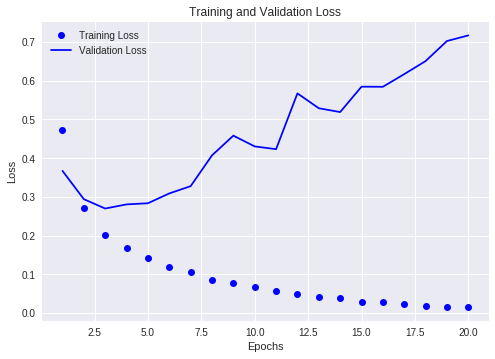

In [91]:
plot_history(history)

In [92]:
# our model overfits we can see that from the spikes on the validation loss
# let's evaluate against our test data
results = model.evaluate(x_test,y_test)

25000/25000 [==============================] - 3s 117us/step


In [93]:
results

[4.5766466352844235, 0.49752]

In [98]:
# let's build a new fresh model

model2 = models.Sequential()
model2.add(layers.Dense(16,activation='tanh',input_shape=(10000,)))
model2.add(layers.Dense(32,activation='tanh'))
model2.add(layers.Dense(16,activation='tanh'))
model2.add(layers.Dense(1,activation='sigmoid'))

# compile the model
model2.compile(optimizer='adam',loss='mse',metrics=['acc'])
hist = model2.fit(x_train_p,y_train_p,epochs=20,batch_size=512,validation_data=(x_val,y_val))
results = model2.evaluate(x_test,y_test)


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 2s 85us/step - loss: 0.1491 - acc: 0.8132 - val_loss: 0.0879 - val_acc: 0.8828
Epoch 2/20
20000/20000 [==============================] - 1s 64us/step - loss: 0.0606 - acc: 0.9248 - val_loss: 0.0841 - val_acc: 0.8884
Epoch 3/20
20000/20000 [==============================] - 1s 65us/step - loss: 0.0410 - acc: 0.9521 - val_loss: 0.0856 - val_acc: 0.8864
Epoch 4/20
20000/20000 [==============================] - 1s 65us/step - loss: 0.0296 - acc: 0.9681 - val_loss: 0.0924 - val_acc: 0.8818
Epoch 5/20
20000/20000 [==============================] - 1s 67us/step - loss: 0.0248 - acc: 0.9737 - val_loss: 0.0981 - val_acc: 0.8758
Epoch 6/20
20000/20000 [==============================] - 1s 66us/step - loss: 0.0195 - acc: 0.9807 - val_loss: 0.0999 - val_acc: 0.8746
Epoch 7/20
20000/20000 [==============================] - 1s 66us/step - loss: 0.0157 - acc: 0.9849 - val_loss: 0.1062 - val_acc:

20000/20000 [==============================] - 1s 65us/step - loss: 0.0132 - acc: 0.9876 - val_loss: 0.1074 - val_acc: 0.8726
Epoch 9/20
20000/20000 [==============================] - 1s 66us/step - loss: 0.0117 - acc: 0.9888 - val_loss: 0.1102 - val_acc: 0.8714
Epoch 10/20
20000/20000 [==============================] - 1s 65us/step - loss: 0.0109 - acc: 0.9896 - val_loss: 0.1103 - val_acc: 0.8714
Epoch 11/20
20000/20000 [==============================] - 1s 67us/step - loss: 0.0105 - acc: 0.9897 - val_loss: 0.1108 - val_acc: 0.8726
Epoch 12/20
20000/20000 [==============================] - 1s 66us/step - loss: 0.0102 - acc: 0.9899 - val_loss: 0.1112 - val_acc: 0.8722
Epoch 13/20
20000/20000 [==============================] - 1s 66us/step - loss: 0.0100 - acc: 0.9900 - val_loss: 0.1116 - val_acc: 0.8722
Epoch 14/20
20000/20000 [==============================] - 1s 65us/step - loss: 0.0099 - acc: 0.9902 - val_loss: 0.1126 - val_acc: 0.8714
Epoch 15/20
20000/20000 [======================

20000/20000 [==============================] - 1s 66us/step - loss: 0.0097 - acc: 0.9904 - val_loss: 0.1130 - val_acc: 0.8714
Epoch 17/20
20000/20000 [==============================] - 1s 67us/step - loss: 0.0095 - acc: 0.9905 - val_loss: 0.1134 - val_acc: 0.8712
Epoch 18/20
20000/20000 [==============================] - 1s 66us/step - loss: 0.0095 - acc: 0.9905 - val_loss: 0.1133 - val_acc: 0.8710
Epoch 19/20
20000/20000 [==============================] - 1s 65us/step - loss: 0.0094 - acc: 0.9906 - val_loss: 0.1134 - val_acc: 0.8708
Epoch 20/20
25000/25000 [==============================] - 3s 117us/step


[0.4792016688346863, 0.50052]


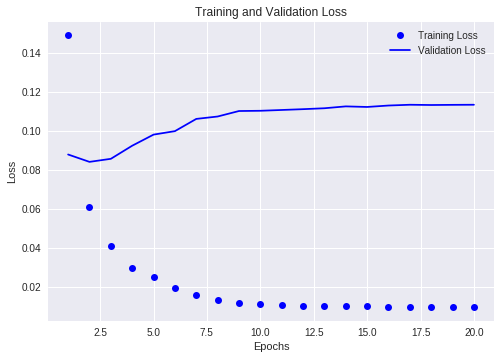

In [99]:
print(results)
plot_history(hist)

In [0]:
# mnist

from keras.datasets import mnist

(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [0]:
#  normalize dataset mnist is a gray scale image dataset 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# flatten
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

In [0]:
x_val = x_train[:10000]
y_val = y_train[:10000]
x_train_ = x_train[10000:]
y_train_ = y_train[10000:]

In [0]:
from keras import utils
# convert class vectors to binary class matrices
y_train_ = utils.to_categorical(y_train_, 10)
y_test = utils.to_categorical(y_test,10)

In [142]:
from keras.layers import Input,Dense
# let's build an autoencoder functional way
input_img = Input(shape=(784,))

# encoder part
encoded = Dense(128,activation='relu',trainable=False)(input_img)
encoded = Dense(64,activation='relu',trainable=False)(encoded)
encoded = Dense(32,activation='relu',trainable=False)(encoded)
"""
# decoder part
decoded = Dense(64,activation='relu')(encoded)
decoded = Dense(128,activation='relu')(decoded)
decoded = Dense(784,activation='sigmoid')(decoded)
"""
out = Dense(10,activation='softmax')(encoded)
autoencoder = models.Model(input_img,out)
autoencoder.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_91 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_92 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_93 (Dense)             (None, 10)                330       
Total params: 111,146
Trainable params: 330
Non-trainable params: 110,816
_________________________________________________________________


In [131]:

autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(x_train_,x_train_,epochs=100,batch_size=256,validation_data=(x_val,x_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 48us/step - loss: 0.3782 - val_loss: 0.2657
Epoch 2/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.2603 - val_loss: 0.2555
Epoch 3/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.2472 - val_loss: 0.2417
Epoch 4/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.2345 - val_loss: 0.2265
Epoch 5/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.2187 - val_loss: 0.2133
Epoch 6/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.2088 - val_loss: 0.2053
Epoch 7/100
37376/50000 [=====================>........] - ETA: 0s - loss: 0.2013

50000/50000 [==============================] - 2s 37us/step - loss: 0.2008 - val_loss: 0.1969
Epoch 8/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1938 - val_loss: 0.1895
Epoch 9/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1853 - val_loss: 0.1807
Epoch 10/100
50000/50000 [==============================] - 2s 36us/step - loss: 0.1781 - val_loss: 0.1761
Epoch 11/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1732 - val_loss: 0.1718
Epoch 12/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1693 - val_loss: 0.1674
Epoch 13/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1659 - val_loss: 0.1633
Epoch 14/100
15360/50000 [========>.....................] - ETA: 1s - loss: 0.1636

50000/50000 [==============================] - 2s 37us/step - loss: 0.1624 - val_loss: 0.1608
Epoch 15/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1591 - val_loss: 0.1578
Epoch 16/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1563 - val_loss: 0.1552
Epoch 17/100
50000/50000 [==============================] - 2s 36us/step - loss: 0.1539 - val_loss: 0.1508
Epoch 18/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1517 - val_loss: 0.1515
Epoch 19/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1495 - val_loss: 0.1481
Epoch 20/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1474 - val_loss: 0.1463
Epoch 21/100
13824/50000 [=======>......................] - ETA: 1s - loss: 0.1469

50000/50000 [==============================] - 2s 36us/step - loss: 0.1458 - val_loss: 0.1448
Epoch 22/100
50000/50000 [==============================] - 2s 36us/step - loss: 0.1442 - val_loss: 0.1422
Epoch 23/100
50000/50000 [==============================] - 2s 36us/step - loss: 0.1428 - val_loss: 0.1399
Epoch 24/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1416 - val_loss: 0.1403
Epoch 25/100
50000/50000 [==============================] - 2s 36us/step - loss: 0.1404 - val_loss: 0.1393
Epoch 26/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1390 - val_loss: 0.1388
Epoch 27/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1378 - val_loss: 0.1353
Epoch 28/100
11008/50000 [=====>........................] - ETA: 1s - loss: 0.1366

50000/50000 [==============================] - 2s 37us/step - loss: 0.1365 - val_loss: 0.1362
Epoch 29/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1354 - val_loss: 0.1352
Epoch 30/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1343 - val_loss: 0.1345
Epoch 31/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1335 - val_loss: 0.1341
Epoch 32/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1326 - val_loss: 0.1318
Epoch 33/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1316 - val_loss: 0.1305
Epoch 34/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1309 - val_loss: 0.1302
Epoch 35/100
 9472/50000 [====>.........................] - ETA: 1s - loss: 0.1303

50000/50000 [==============================] - 2s 38us/step - loss: 0.1301 - val_loss: 0.1282
Epoch 36/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1292 - val_loss: 0.1287
Epoch 37/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1284 - val_loss: 0.1291
Epoch 38/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1277 - val_loss: 0.1282
Epoch 39/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1269 - val_loss: 0.1268
Epoch 40/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1261 - val_loss: 0.1249
Epoch 41/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1256 - val_loss: 0.1249
Epoch 42/100
 9472/50000 [====>.........................] - ETA: 1s - loss: 0.1245

50000/50000 [==============================] - 2s 37us/step - loss: 0.1249 - val_loss: 0.1237
Epoch 43/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1244 - val_loss: 0.1225
Epoch 44/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1236 - val_loss: 0.1231
Epoch 45/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1229 - val_loss: 0.1242
Epoch 46/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1223 - val_loss: 0.1222
Epoch 47/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1217 - val_loss: 0.1196
Epoch 48/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1211 - val_loss: 0.1202
Epoch 49/100
10752/50000 [=====>........................] - ETA: 1s - loss: 0.1204

50000/50000 [==============================] - 2s 38us/step - loss: 0.1205 - val_loss: 0.1199
Epoch 50/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1199 - val_loss: 0.1194
Epoch 51/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1194 - val_loss: 0.1188
Epoch 52/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1188 - val_loss: 0.1182
Epoch 53/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1184 - val_loss: 0.1175
Epoch 54/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1178 - val_loss: 0.1163
Epoch 55/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1176 - val_loss: 0.1155
Epoch 56/100
 6400/50000 [==>...........................] - ETA: 1s - loss: 0.1159

50000/50000 [==============================] - 2s 38us/step - loss: 0.1170 - val_loss: 0.1174
Epoch 57/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1165 - val_loss: 0.1189
Epoch 58/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1162 - val_loss: 0.1146
Epoch 59/100
50000/50000 [==============================] - 2s 39us/step - loss: 0.1157 - val_loss: 0.1151
Epoch 60/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1152 - val_loss: 0.1154
Epoch 61/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1149 - val_loss: 0.1141
Epoch 62/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1145 - val_loss: 0.1131
Epoch 63/100
 7680/50000 [===>..........................] - ETA: 1s - loss: 0.1143

50000/50000 [==============================] - 2s 38us/step - loss: 0.1141 - val_loss: 0.1141
Epoch 64/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1137 - val_loss: 0.1140
Epoch 65/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1132 - val_loss: 0.1126
Epoch 66/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1128 - val_loss: 0.1128
Epoch 67/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1124 - val_loss: 0.1118
Epoch 68/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1121 - val_loss: 0.1131
Epoch 69/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1118 - val_loss: 0.1129
Epoch 70/100
12544/50000 [======>.......................] - ETA: 1s - loss: 0.1121

50000/50000 [==============================] - 2s 36us/step - loss: 0.1114 - val_loss: 0.1109
Epoch 71/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1110 - val_loss: 0.1102
Epoch 72/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1108 - val_loss: 0.1113
Epoch 73/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1103 - val_loss: 0.1093
Epoch 74/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1100 - val_loss: 0.1097
Epoch 75/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1098 - val_loss: 0.1104
Epoch 76/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1096 - val_loss: 0.1095
Epoch 77/100
11008/50000 [=====>........................] - ETA: 1s - loss: 0.1094

50000/50000 [==============================] - 2s 38us/step - loss: 0.1092 - val_loss: 0.1077
Epoch 78/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1089 - val_loss: 0.1100
Epoch 79/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1087 - val_loss: 0.1097
Epoch 80/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1083 - val_loss: 0.1081
Epoch 81/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1081 - val_loss: 0.1085
Epoch 82/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1079 - val_loss: 0.1082
Epoch 83/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1076 - val_loss: 0.1092
Epoch 84/100
11008/50000 [=====>........................] - ETA: 1s - loss: 0.1079

50000/50000 [==============================] - 2s 37us/step - loss: 0.1075 - val_loss: 0.1067
Epoch 85/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1072 - val_loss: 0.1046
Epoch 86/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1069 - val_loss: 0.1070
Epoch 87/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1067 - val_loss: 0.1066
Epoch 88/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1065 - val_loss: 0.1064
Epoch 89/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1063 - val_loss: 0.1053
Epoch 90/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1060 - val_loss: 0.1066
Epoch 91/100
11008/50000 [=====>........................] - ETA: 1s - loss: 0.1060

50000/50000 [==============================] - 2s 37us/step - loss: 0.1058 - val_loss: 0.1063
Epoch 92/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1056 - val_loss: 0.1067
Epoch 93/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1054 - val_loss: 0.1058
Epoch 94/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1054 - val_loss: 0.1051
Epoch 95/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1052 - val_loss: 0.1054
Epoch 96/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1048 - val_loss: 0.1063
Epoch 97/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1047 - val_loss: 0.1052
Epoch 98/100
11008/50000 [=====>........................] - ETA: 1s - loss: 0.1045

50000/50000 [==============================] - 2s 37us/step - loss: 0.1044 - val_loss: 0.1070
Epoch 99/100
50000/50000 [==============================] - 2s 38us/step - loss: 0.1043 - val_loss: 0.1054
Epoch 100/100
50000/50000 [==============================] - 2s 37us/step - loss: 0.1040 - val_loss: 0.1036


In [0]:
output = layers.Dense(10,activation='softmax')(encoded)
autoencoder.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


In [140]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_75 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_76 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_77 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_78 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_79 (Dense)             (None, 784)               101136    
Total para

In [143]:
autoencoder.fit(x_train_,y_train_,epochs=10,batch_size=32)
score = autoencoder.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
50000/50000 [==============================] - 7s 134us/step - loss: 2.0546 - acc: 0.3565
Epoch 2/10
50000/50000 [==============================] - 6s 127us/step - loss: 1.7259 - acc: 0.4845
Epoch 3/10
50000/50000 [==============================] - 6s 129us/step - loss: 1.5778 - acc: 0.5122
Epoch 4/10
27424/50000 [===============>..............] - ETA: 2s - loss: 1.5085 - acc: 0.5250

50000/50000 [==============================] - 6s 128us/step - loss: 1.4956 - acc: 0.5260
Epoch 5/10
50000/50000 [==============================] - 6s 129us/step - loss: 1.4435 - acc: 0.5370
Epoch 6/10
50000/50000 [==============================] - 6s 126us/step - loss: 1.4071 - acc: 0.5432
Epoch 7/10
38848/50000 [======================>.......] - ETA: 1s - loss: 1.3859 - acc: 0.5469

50000/50000 [==============================] - 6s 127us/step - loss: 1.3805 - acc: 0.5488
Epoch 8/10
50000/50000 [==============================] - 6s 127us/step - loss: 1.3602 - acc: 0.5536
Epoch 9/10
50000/50000 [==============================] - 6s 129us/step - loss: 1.3443 - acc: 0.5570
Epoch 10/10
40672/50000 [=======================>......] - ETA: 1s - loss: 1.3353 - acc: 0.5585

50000/50000 [==============================] - 6s 128us/step - loss: 1.3315 - acc: 0.5599
Test loss: 1.3068193284988403
Test accuracy: 0.5711


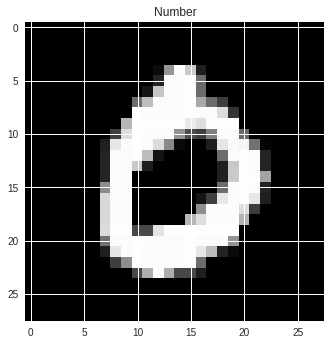

In [144]:
a = x_test[3]
pixels = a.reshape(28,28)
plt.title('Number')
plt.imshow(pixels, cmap='gray')
plt.show()

In [145]:
a.flatten().reshape(1,784)
s = autoencoder.predict(a.reshape(1,784))
res = s.argmax(axis=-1)
print(res)

[0]
